### 3. 앙상블 학습

#### 앙상블 학습 개요
- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 단일 분류기보다 신뢰성이 높은 예측값 얻을 수 있음
- 정형 데이터 분류 시 뛰어난 성능을 나타냄

 **앙상블 학습의 유형**
- 여러 개의 분류기가 투표를 통해 최종 예측 결과 예측하는 방식
1. 보팅(Voting)
    - 서로 다른 알고리즘을 가진 분류기 결합
2. 배깅(Bagging) → Bootstrap Aggregating의 줄임말
    - 모두 같은 유형의 알고리즘 기반으로 데이터 샘플링을 서로 다르게 가져가면서 학습해 보팅 수행
    - 부트스트래핑(Bootstrapping) : 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식 (통계 용어 : 복원 추출 가능한 Random Sampling 기법)
    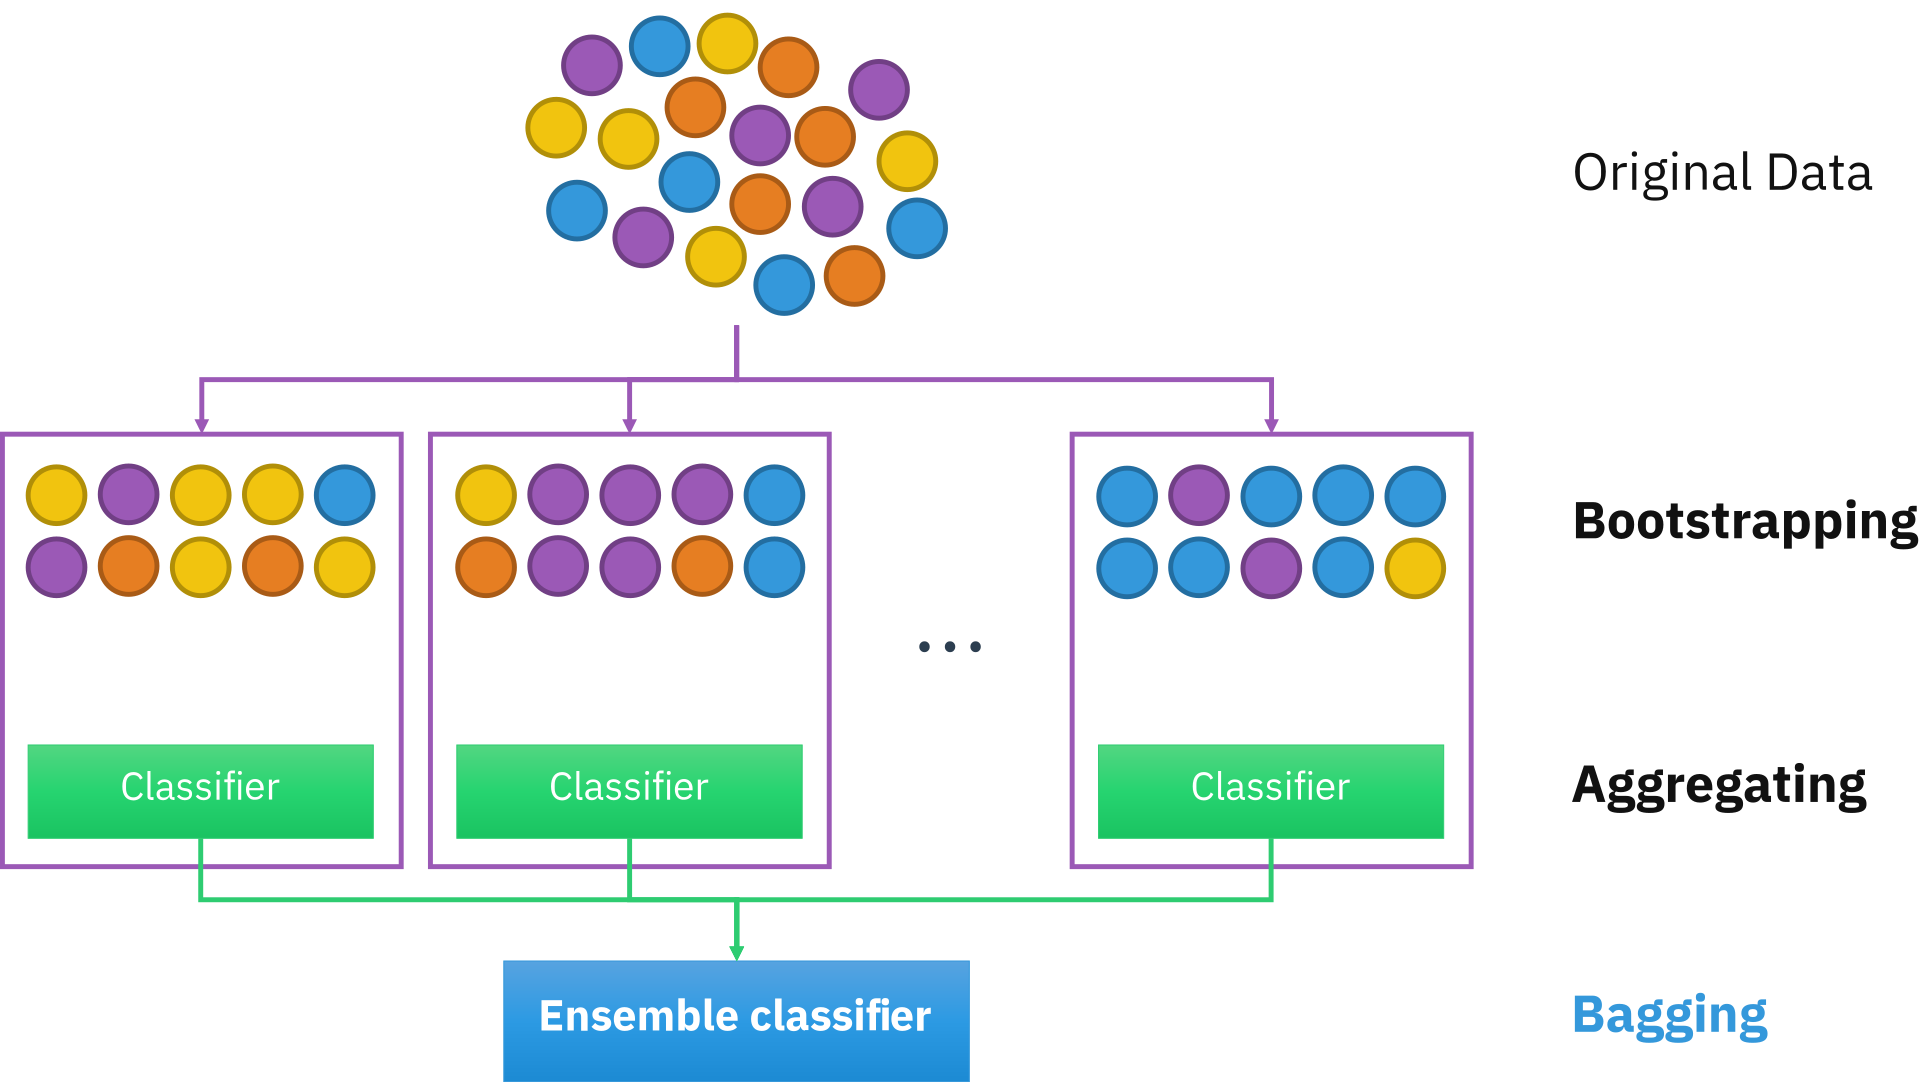
    - 여러 개의 약한 모형을 Bootstrapping으로 샘플링된 데이터를 학습시켜 예측하는 앙상블 모형
    - 약한 모형 ? 랜덤 추출보다 예측력이 좋으나 연산이 빠른 모델(ex.Decision Tree)
    1. 복원 추출을 통해 본래의 분포와 다른 결과에 대해 약한 모형이 학습하기 때문에 과적합에 강함
    2. 트리 모델이 깊어질수록 늘어나는 분산을 줄일 수 있음
    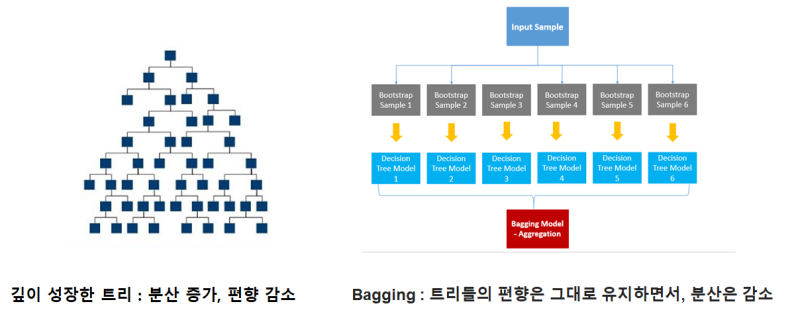
    3. 데이터에 있는 노이즈에 강인해짐.
    - 대표 모델 : 랜덤 포레스트 알고리즘
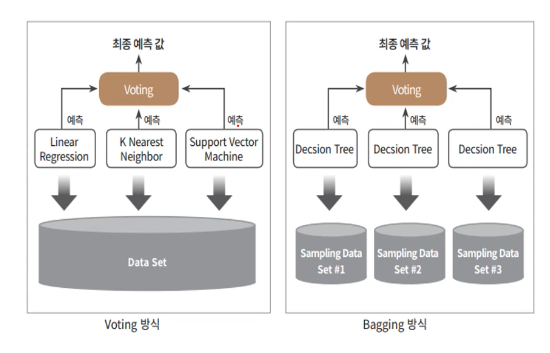
3. 부스팅(Boosting)
    - Kaggle과 같은 Competition에서 우수한 성능을 보이는 모델
    - 여러 개의 분류기가 순차적으로 학습 수행하되, 앞에 학습한 분류기가 예측이 틀린 데이터에 올바르게 예측할 수 있도록 다음 분류기에 가중치 부여하며 학습과 예측 진행
    - Bagging에 비해 과적합 될 수 있는 위험성이 있으나 대체적으로 성능이 더 좋음
    - 예측 성능이 뛰어나 앙상블 학습을 주도하며 그래디언트 부스트, XGBoost, LightGBM이 있음
- 외에도 스태깅을 포함한 다양한 앙상블 방법 존재
- 스태깅 : 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과 예측
    - 단일 모델보다 높은 성능 가짐
    - 해석이 애매하고 과적합 확률이 높아 실제 서비스 모델로 구현하기는 어려움(캐글 같이 정확도만을 목적으로 하는 대회에서 많이 사용)
    - 다수의 모델이 필요하므로 학습 속도도 그만큼 오래 걸림

#### 보팅 유형 - 하드 보팅과 소프트 보팅
1. 하드 보팅
     - 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
2. 소프트 보팅
    - 분류기들의 레이블 값 결정 확률을 모두 더한 후 이를 평균해 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
    - 일반적으로  하드 보팅보다 예측 성능이 좋아 소프트 보팅이 더 많이 사용됨
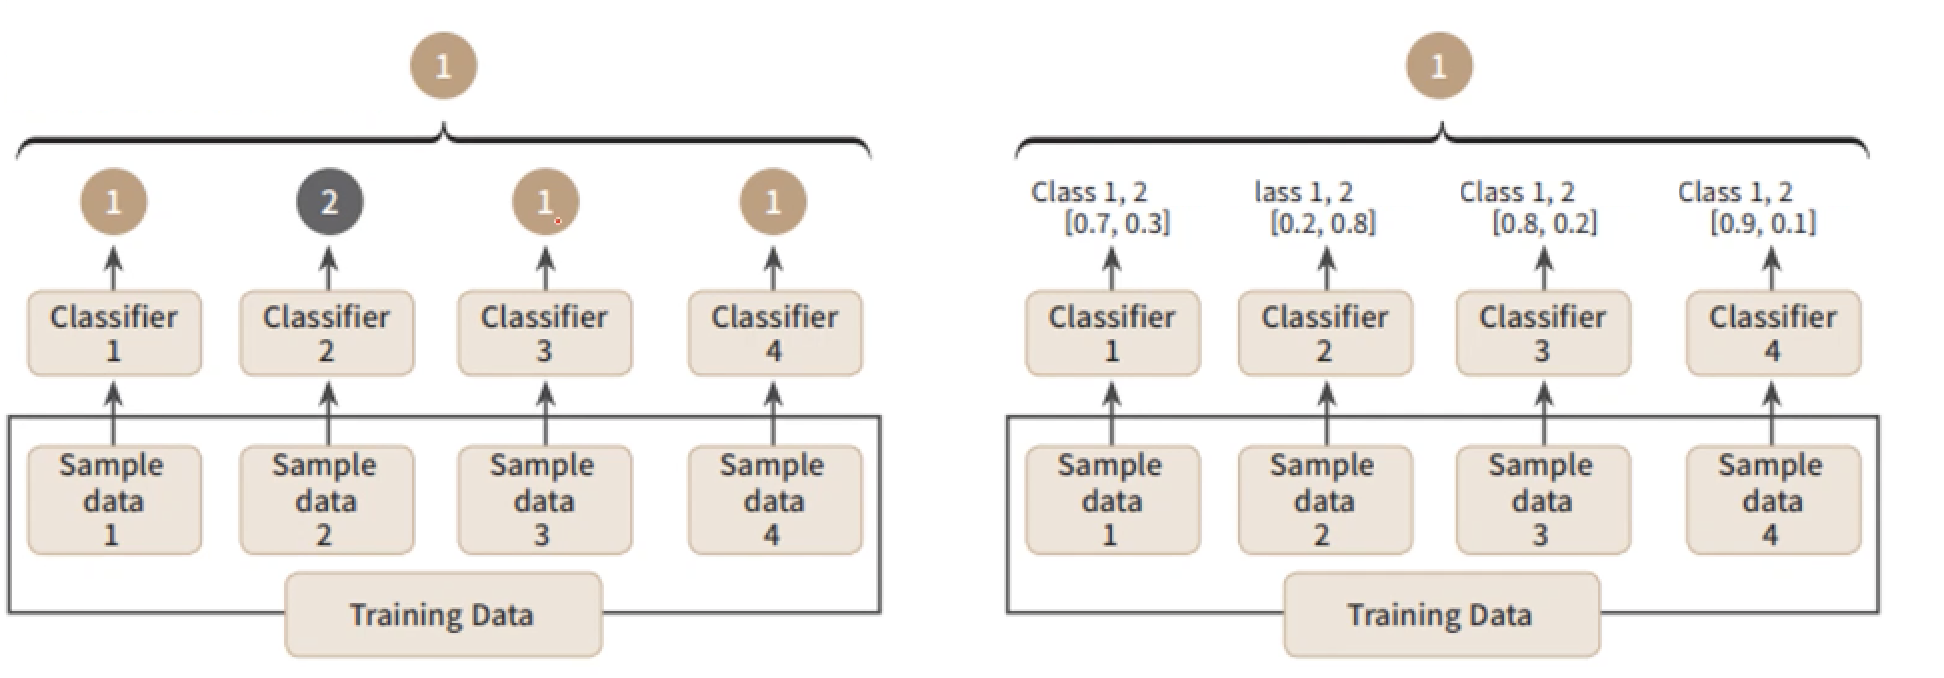

#### 보팅 분류기
- VotingClassifier : 사이킷런에서 제공하는 보팅 방식의 앙상블 구현 클래스

위스콘신 유방암 데이터 세트 예측 분석 by Voting 

In [20]:
# 로지스틱회귀와 KNN 사용
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [21]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
# Voting 분류기의 예측 성능이 무조건 더 높은 것은 아니지만 전반적으로 단일 ML알고리즘보다 뛰어난 예측 성능 가지는 경우가 많음.
# 데이터 특성과 분포 등 다양한 요건에 따라 달라짐

Voting 분류기 정확도:0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 배깅,부스팅은 대부분 결정 트리 알고리즘을 기반으로 함
- 앙상블 학습에서는 결정 트리 알고리즘의 단점(과적합)을 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복함

### 4. 랜덤 포레스트

#### 랜덤 포레스트 개요 및 실습
- 배깅의 대표적인 알고리즘
- 앙상블 알고리즘 중 비교적 빠른 수행 속도
- 다양한 영역에서 높은 예측 성능 보임
- 결정 트리를 기반으로 하며 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음(대부분의 부스팅 기반 앙상블 알고리즘은 결정트리를 기반으로 함)
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자 데이터 샘플링해 개별적 학습 수행한 후 최종적으로 보팅을 통해 예측 결정
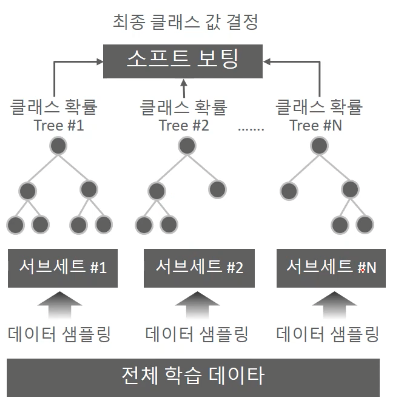

- 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트임
- 부트 스트래핑 분할 방식 : 여러 개의 데이터 세트를 중첩되게 분리하는 것
- 랜덤 포레스트의 서브 세트 데이터 건 수 = 전체 데이터 건수
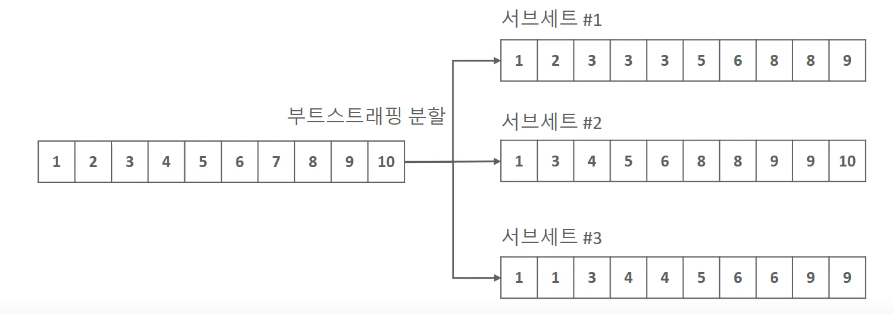

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy))
# 약 91.96%의 정확도를 보여줌

랜덤 포레스트 정확도:0.9196


#### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
- 트리 기반 앙상블 알고리즘의 단점
    - 하이퍼 파라미터가 너무 많고 그로 인해 튜닝 시간이 많이 소모 됨 → 트리 기반 하이퍼 파라미터 + 배깅,부스팅,학습,정규화 등을 위한 하이퍼 파라미터도 추가되기 때문
    - 튜닝 후 예측 성능이 향상되는 경우가 많지 않음

In [27]:
# GridSearchCV로 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[8,6,24],
         'min_samples_leaf':[1,6,12],
         'min_samples_split':[2,8,16]}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:',grid_cv.best_score_)

최적 하이퍼 파라미터:
 {'max_depth': 24, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9162132752992382


In [29]:
# 최적의 하이퍼 파라미터로 랜덤 포레스트 분류기 학습 후 예측 성능 측정
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(accuracy_score(y_test,pred))

0.9260264675941635


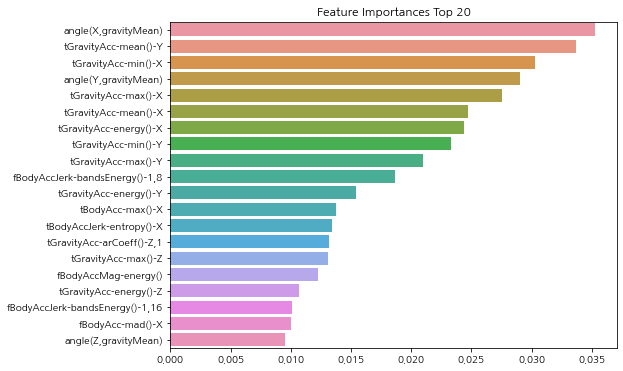

In [30]:
# 피처 중요도 시각화

ftr_importance_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()